In [19]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
df = pd.read_csv('./Tables_traitees/DF_FINAL_FOR_MODELISATION.csv', sep=',')

In [3]:
df.shape

(36256, 77)

In [4]:
df.head()

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,E_Prix_consolidé_KNN,F_Prix_consolidé_RFReg,E_NbVentes_estime_KNN,E_NbVentes_consolidé_KNN,F_NbVentes_estimé_RFReg,F_NbVentes_consolidé_RFReg,1_code_commune_n,1_Nb_bornes_électriques,2_code_commune_n,2_Nb_stations_carburants,7_code_commune_n,7_Nb_gares_ferroviares,8_code_commune_n,8_Nb_aeroports
0,84.0,Auvergne-Rhône-Alpes,1,1.0,L' Abergement-Clémenciat,767.0,18.0,785.0,2016.0,2019.0,1001.0,15.65,Commune,200035210,CC Chalaronne Centre,49.009585,COMMUNE_0000000009750236,1001.0,1.0,84.0,200069193.0,ABERGEMENT CLEMENCIAT,767.0,7.0,1938.0,5.0,1001.0,1001.0,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,RHONE-ALPES,242.0,1565.0,0.8,"46.153425521369456, 4.926113542231843","{""coordinates"": [[[4.92627342692396, 46.120051...",7342.0,1.0,10.0,2.0,1.0,82.0,46.153426,4.926114,51.118211,1001.0,L'Abergement-Clémenciat,6.0,01412|01093|01028|01146|01351|01188,Sulignat|Châtillon-sur-Chalaronne|Baneins|Domp...,48|144|203|234|260|322,NaN,1938.0,2167.500000,1938.0,2080.5,1631.0,1448.0,1982.906252,1706.764487,2089.833333,1938.0,1938.0,6.161290,7.0,20.003477,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84.0,Auvergne-Rhône-Alpes,1,2.0,L' Abergement-de-Varey,243.0,1.0,244.0,2016.0,2019.0,1002.0,9.13,Commune,240100883,CC de la Plaine de l'Ain,26.615553,COMMUNE_0000000009750692,1002.0,1.0,84.0,240100883.0,ABERGEMENT DE VAREY,243.0,8.0,1130.0,5.0,1002.0,1002.0,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,RHONE-ALPES,483.0,912.0,0.2,"46.009187877601306, 5.428016963625987","{""coordinates"": [[[5.430089291292173, 45.98275...",32385.0,2.0,1.0,1.0,1.0,82.0,46.009188,5.428017,21.929825,1002.0,L'Abergement-de-Varey,6.0,01056|01277|01384|01007|01363|01199,Boyeux-Saint-Jérôme|Nivollet-Montgriffon|Saint...,43|115|172|265|302|344,NaN,1130.0,1503.879310,1130.0,1458.5,1631.0,1448.0,1498.086511,1697.845863,1640.416667,1130.0,1130.0,19.322581,8.0,15.800847,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84.0,Auvergne-Rhône-Alpes,1,4.0,Ambérieu-en-Bugey,14081.0,437.0,14518.0,2016.0,2019.0,1004.0,24.49,Commune,240100883,CC de la Plaine de l'Ain,574.969375,COMMUNE_0000000009750944,1004.0,1.0,84.0,240100883.0,AMBERIEU EN BUGEY,14081.0,168.0,2005.0,5.0,1004.0,1004.0,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,RHONE-ALPES,379.0,2448.0,13.4,"45.96084751144621, 5.372925777699918","{""coordinates"": [[[5.386190824025674, 45.93092...",463.0,4.0,1.0,1.0,1.0,82.0,45.960848,5.372926,547.385621,1004.0,Ambérieu-en-Bugey,7.0,01384|01421|01041|01345|01089|01007|01149,Saint-Rambert-en-Bugey|Torcieu|Bettant|Saint-D...,102|151|190|250|284|347|360,NaN,2005.0,1725.714286,2005.0,1678.0,1631.0,1448.0,1901.663645,1971.821652,1754.000000,2005.0,2005.0,19.387097,168.0,15.888337,168.0,1004.0,9.0,1004.0,3.0,1004.0,1.0,NaN,NaN
3,84.0,Auvergne-Rhône-Alpes,1,5.0,Ambérieux-en-Dombes,1671.0,34.0,1705.0,2016.0,2019.0,1005.0,16.05,Commune,200042497,CC Dombes Saône Vallée,104.112150,COMMUNE_0000000009750958,1005.0,1.0,84.0,200042497.0,AMBERIEUX EN DOMBES,1671.0,13.0,2442.0,5.0,1005.0,1005.0,01330,AMBERIEUX-EN-DOMBES,AIN,RHO

In [21]:
df['8_Nb_aeroports'] = df['8_Nb_aeroports'].fillna(0)
df['7_Nb_gares_ferroviares'] = df['7_Nb_gares_ferroviares'].fillna(0)
df['2_Nb_stations_carburants'] = df['2_Nb_stations_carburants'].fillna(0)
df['1_Nb_bornes_électriques'] = df['1_Nb_bornes_électriques'].fillna(0)

In [6]:
# Valeurs uniques et manquant par colonne
df_analyse = []
manquantes = df.isna().sum()
for t in df.columns:
    row = {}
    row['Variable']=t
    row['type']= df[t].dtypes
    row['Nb_val_unique']=len(df[t].unique())
    row['Nb_manquant']=manquantes[t]
    df_analyse.append(row)
df_analyse = pd.DataFrame(df_analyse)
df_analyse.sort_values(by='Nb_manquant',ascending=False)

,Variable,type,Nb_val_unique,Nb_manquant
75,8_code_commune_n,float64,86,36171
53,6_type,object,9,35496
73,7_code_commune_n,float64,2551,33706
71,2_code_commune_n,float64,5610,30647
69,1_code_commune_n,float64,7454,28803
23,5_Nb_Ventes,float64,553,9512
24,5_PrixMoyen_M2,float64,3683,9512
57,B_Prix_estimé_vois_median,float64,9547,1859
55,A_Prix_estimé_vois_mean,float64,29365,1859
48,6_nom,object,32223,1805


In [7]:
df['3_Code INSEE (commune ou arrondissement)'].unique()[30480:30500]

array([75116., 75117., 75118., 75119., 75120., 76001., 76002., 76004.,
       76005., 76006., 76007., 76008., 76009., 76010., 76011., 76012.,
       76013., 76014., 76015., 76016.])

In [18]:
df[df['2_code_commune_n']==75056.]

,3_Code région,3_Nom de la région,3_Code département,3_Code commune,3_Nom de la commune,3_Population municipale,3_Population comptée à part,3_Population totale,3_Année recensement,3_Année utilisation,3_Code INSEE (commune ou arrondissement),3_Superficie de la commune,3_Statut,3_Code EPCI,3_EPCI,3_Densité_hab_par_km2,5_ID,5_INSEE_COM,5_INSEE_DEP,5_INSEE_REG,5_CODE_EPCI,5_NOM_COM_M,5_POPULATION,5_Nb_Ventes,5_PrixMoyen_M2,5_nb_digits_code_INSEE,5_code_commune_n,4_Code INSEE,4_Code Postal,4_Commune,4_Département,4_Région,4_Statut,4_Altitude Moyenne,4_Superficie,4_Population,4_geo_point_2d,4_geo_shape,4_ID Geofla,4_Code Commune,4_Code Canton,4_Code Arrondissement,4_Code Département,4_Code Région,4_lat,4_lon,4_Densité_hab_par_km2,6_insee,6_nom,6_nb_voisins,6_insee_voisins,6_noms_voisins,6_cap_voisins,6_type,A_Prix_consolidé_vois_mean,A_Prix_estimé_vois_mean,B_Prix_consolidé_vois_median,B_Prix_estimé_vois_median,C_Prix_estime_mean,C1_Prix_estime_median,F_Prix_estimé_RFReg,G_Prix_estimé_LassoCV,E_Prix_estime_KNN,E_Prix_consolidé_KNN,F_Prix_consolidé_RFReg,E_NbVentes_estime_KNN,E_NbVentes_consolidé_KNN,F_NbVentes_estimé_RFReg,F_NbVentes_consolidé_RFReg,1_code_commune_n,1_Nb_bornes_électriques,2_code_commune_n,2_Nb_stations_carburants,7_code_commune_n,7_Nb_gares_ferroviares,8_code_commune_n,8_Nb_aeroports


In [14]:
df['2_code_commune_n'].unique()[4450:4550]

array([74137., 74143., 74150., 74154., 74159., 74163., 74164., 74176.,
       74191., 74208., 74210., 74211., 74212., 74215., 74218., 74220.,
       74224., 74225., 74233., 74236., 74238., 74239., 74241., 74243.,
       74250., 74256., 74258., 74263., 74264., 74267., 74269., 74272.,
       74276., 74278., 74280., 74281., 74282., 74288., 74293., 74298.,
       74302., 74305., 74308., 74311., 74314., 75101., 75107., 75108.,
       75110., 75111., 75112., 75114., 75115., 75116., 75117., 75118.,
       75119., 75120., 76034., 76035., 76051., 76057., 76075., 76095.,
       76101., 76103., 76108., 76114., 76116., 76125., 76126., 76146.,
       76157., 76159., 76164., 76178., 76192., 76196., 76212., 76216.,
       76217., 76219., 76222., 76231., 76235., 76238., 76240., 76255.,
       76258., 76259., 76260., 76263., 76276., 76278., 76294., 76295.,
       76302., 76305., 76307., 76312.])

In [22]:
top20 = df.sort_values(by=['2_Nb_stations_carburants'], ascending=False)[:20]
top20[['3_Code INSEE (commune ou arrondissement)', '2_code_commune_n', '3_Nom de la commune','2_Nb_stations_carburants']]

,3_Code INSEE (commune ou arrondissement),2_code_commune_n,3_Nom de la commune,2_Nb_stations_carburants
12078,31555.0,31555.0,Toulouse,38.0
2019,6088.0,6088.0,Nice,34.0
30180,74010.0,74010.0,Annecy,26.0
34562,87085.0,87085.0,Limoges,24.0
13293,34172.0,34172.0,Montpellier,22.0
19415,51454.0,51454.0,Reims,21.0
11360,30189.0,30189.0,Nîmes,21.0
16735,44109.0,44109.0,Nantes,18.0
25563,63113.0,63113.0,Clermont-Ferrand,18.0
13695,35238.0,35238.0,Rennes,18.0


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a new dataframe with the selected columns
df_kmeans = df[['2_Nb_stations_carburants',
             '3_Code région', 
             '3_Code INSEE (commune ou arrondissement)', 
             '3_Population totale', 
             '3_Population comptée à part', 
             '3_Population municipale', 
             '3_Code commune', 
             '3_Code département', 
             '4_lon', 
             '4_lat', 
             '4_Altitude Moyenne',
             '4_Superficie',
             '7_Nb_gares_ferroviares', 
             '8_Nb_aeroports',
             'F_Prix_consolidé_RFReg']]

# Instantiate the StandardScaler object
scaler = StandardScaler()

# Fit and transform the df_kmeans dataframe
df_kmeans_scaled = scaler.fit_transform(df_kmeans)

# Instantiate and fit the KMeans object
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df_kmeans_scaled)
kmeans.labels_



array([0, 0, 0, ..., 0, 0, 0])

In [27]:
data = df[['2_Nb_stations_carburants',
             '3_Code région', 
            #  '3_Code INSEE (commune ou arrondissement)', 
             '3_Population totale', 
            #  '3_Population comptée à part', 
            #  '3_Population municipale',
             '3_Code département', 
             '4_lon', 
             '4_lat', 
             '4_Altitude Moyenne',
             '4_Superficie',
             '7_Nb_gares_ferroviares', 
             '8_Nb_aeroports',
             'F_Prix_consolidé_RFReg']]
labels = df[['1_Nb_bornes_électriques']].values.ravel()

In [24]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_clusters = 4

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_clusters, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_clusters).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_clusters, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.316s	268180	0.037	0.032	0.035	0.005	0.030	-0.089
random   	0.334s	267317	0.028	0.026	0.027	0.033	0.023	0.025
PCA-based	0.086s	267317	0.028	0.026	0.027	0.033	0.023	-0.376
__________________________________________________________________________________


C:\Users\plele\AppData\Local\Temp\ipykernel_5632\3063755937.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('rainbow'),


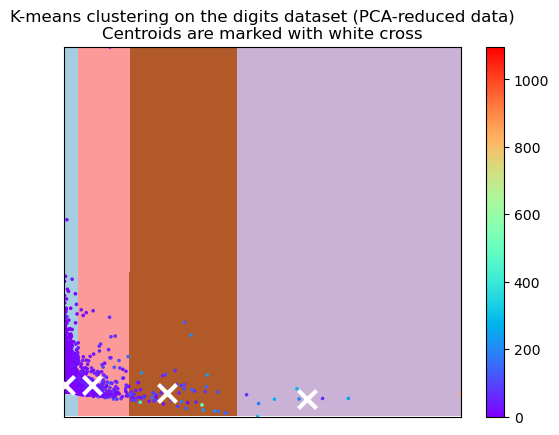

In [29]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 20  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
    )

plt.scatter(
    reduced_data[:, 0],
    reduced_data[:, 1],
    c=labels,
    cmap=plt.cm.get_cmap('rainbow'),
    marker=".",
    s=10,
    )

# Add colorbar legend
plt.colorbar()

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(
#     centroids[:, 0],
#     centroids[:, 1],
#     marker="x",
#     s=169,
#     linewidths=3,
#     color="w",
#     zorder=10,
# )

# plt.title(
#     "K-means clustering on the digits dataset (PCA-reduced data)\n"
#     "Centroids are marked with white cross"
# )
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()
    
# )

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(
#     centroids[:, 0],
#     centroids[:, 1],
#     marker="x",
#     s=169,
#     linewidths=3,
#     color="w",
#     zorder=10,
# )
# plt.title(
#     "K-means clustering on the digits dataset (PCA-reduced data)\n"
#     "Centroids are marked with white cross"
# )
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()


In [ ]:
import plotly.express as px

# FILEPATH: Untitled-1.ipynb
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig = px.imshow(
    Z,
    x=np.arange(x_min, x_max, h),
    y=np.arange(y_min, y_max, h),
    color_continuous_scale='Viridis',
    origin='lower'
)

fig.add_trace(
    px.scatter(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        color=labels,
        color_continuous_scale='Rainbow',
        # marker=dict(size=10),
    ).data[0]
)

fig.add_trace(
    px.scatter(
        x=centroids[:, 0],
        y=centroids[:, 1],
        # symbol=np.array('X'),#dict(symbol='x', size=10, color='white', line=dict(width=3)),
    ).data[0]
)

fig.update_layout(
    title="K-means clustering on the digits dataset (PCA-reduced data)\nCentroids are marked with white cross",
    xaxis=dict(range=[x_min, x_max], showticklabels=False),
    yaxis=dict(range=[y_min, y_max], showticklabels=False),
)
fig.update_layout({"scene": {"aspectratio": {"x": 2, "y": 20}}})
fig.show()


In [ ]:
# df.to_csv('./Tables_traitees/DF_FINAL_FOR_MODELISATION.csv', index=False)